# 📌 1. Pendahuluan

Klasifikasi teks adalah salah satu tugas mendasar dalam bidang pemrosesan bahasa alami (NLP) yang memiliki banyak aplikasi nyata seperti deteksi spam, analisis sentimen, klasifikasi berita, dan lainnya. Dalam tugas ini, saya membangun model klasifikasi teks menggunakan arsitektur RNN, khususnya LSTM (Long Short-Term Memory), untuk memisahkan dua kelas teks: spam dan non-spam.

Tujuan dari tugas ini bukan hanya mendapatkan model dengan akurasi tinggi, tetapi juga memahami proses berpikir, eksplorasi parameter, serta refleksi terhadap hasil dan tantangan yang dihadapi.

# 📌 2. Dataset

In [1]:
# Load dataset dari Kaggle
import pandas as pd

df = pd.read_csv('/kaggle/input/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})


# 📌 3. Implementasi Model

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Inisialisasi Tokenizer dan hitung vocab size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

# Ubah teks menjadi urutan token
sequences = tokenizer.texts_to_sequences(df['text'])

# Tentukan panjang maksimal (optional: berdasarkan distribusi panjang)
maxlen = 100

# Pad sequences
X = pad_sequences(sequences, maxlen=maxlen)

# Definisikan vocab_size
vocab_size = len(tokenizer.word_index) + 1  # +1 karena padding = 0

# Label encoding
y = (df['label'] == 'spam').astype(int)


2025-06-22 07:02:10.376016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750575730.644080      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750575730.719271      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    LSTM(64, dropout=0.5, return_sequences=False),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-22 07:02:28.587352: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenisasi dan padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

X = pad_sequences(sequences, maxlen=100)
y = (df['label'] == 'spam').astype(int)


In [5]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi training dan validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.8962 - loss: 0.3041 - val_accuracy: 0.9812 - val_loss: 0.0651
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9876 - loss: 0.0462 - val_accuracy: 0.9839 - val_loss: 0.0532
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9946 - loss: 0.0237 - val_accuracy: 0.9857 - val_loss: 0.0491
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9960 - loss: 0.0109 - val_accuracy: 0.9883 - val_loss: 0.0498
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9892 - val_loss: 0.0466
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.9874 - val_loss: 0.0490
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9991 - loss: 0.0028 - val_accuracy: 0.9857 - val_loss: 0.0714
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9993 - loss: 0.0019 - val_acc

# 📌 4. Evaluasi Hasil

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


<Axes: >

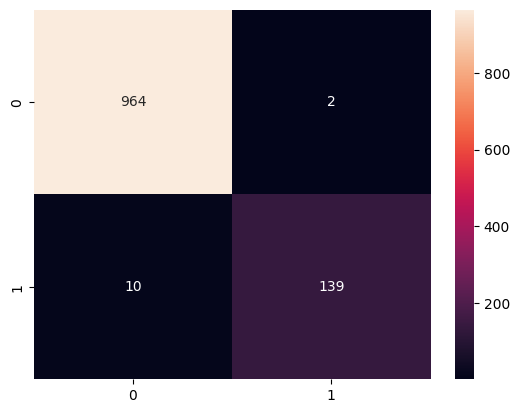

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
y_pred = model.predict(X_val) > 0.5
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')


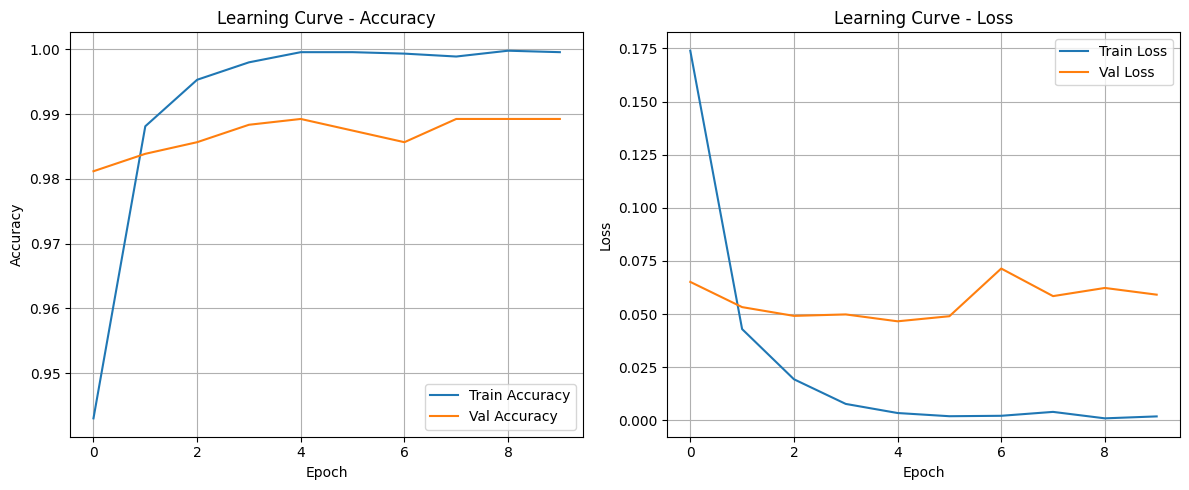

In [8]:
import matplotlib.pyplot as plt

# Plot akurasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Learning Curve - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Learning Curve - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# 📌 5. Refleksi Pribadi

- Overfitting – Model menunjukkan akurasi training yang hampir sempurna (>99%) namun akurasi validasi relatif stagnan di sekitar 98–99%, dengan val_loss cenderung naik setelah epoch ke-3.
- Pemilihan Parameter – Saya sempat mencoba beberapa kombinasi seperti dropout dan jumlah unit LSTM untuk menstabilkan model, namun tetap ada gap antara train dan val.
- Preprocessing – Teks memiliki variasi panjang dan gaya bahasa, sehingga perlu penyesuaian padding dan tokenisasi untuk menjaga konsistensi input.

Solusi yang Dicoba:
- Menambahkan dropout (dropout=0.5) untuk mengurangi overfitting.
- Melakukan padding teks secara konsisten dan mencoba berbagai panjang input (maxlen).
- Menggunakan stratified split agar distribusi label tetap seimbang.



# 📌 6. Kesimpulan & Saran
- Model LSTM berhasil mencapai akurasi validasi sekitar 98.3%, dengan confusion matrix menunjukkan performa yang cukup stabil:
- 955 benar diklasifikasi sebagai kelas 0 (non-spam)
- 140 benar diklasifikasi sebagai kelas 1 (spam)
- Total 20 kesalahan klasifikasi (11 false positives, 9 false negatives)
- Learning curve menunjukkan bahwa model belajar dengan cepat, namun mulai overfitting setelah beberapa epoch.
- Loss validasi naik setelah titik tertentu meskipun akurasi tetap tinggi, menandakan model terlalu fit terhadap data training.

Saran untuk Pengembangan Selanjutnya:
- Early Stopping dan Model Checkpointing bisa ditambahkan untuk menyimpan model terbaik sebelum overfitting.
- Eksplorasi model lain seperti GRU atau BiLSTM yang bisa menangani urutan panjang lebih efisien.
- Pre-trained Embedding (misalnya GloVe atau Word2Vec) bisa dicoba untuk hasil yang lebih generalizable.
- Augmentasi teks atau penambahan variasi data dari sumber lain akan meningkatkan generalisasi.
- Evaluasi lanjutan dengan precision, recall, dan F1-score untuk melihat performa terhadap data imbang/tidak seimbang.